In [4]:
import sys
import os
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '..')))
import numpy as np
import gillespy2

from gillespy2 import TauHybridSolver
from gillespy2 import TauHybridCSolver
from matplotlib import pyplot as plt

In [11]:
def create_on_off_reaction(initial_value=1):
    """Creates a stochastic model for the dichotomous Markov process OFF <-> ON"""

    # Intialize the Model with a name of your choosing.
    model = gillespy2.Model(name="on_off")

    """
    Variables (GillesPy2.Species) can be anything that participates in or is produced by a reaction channel.

    - name: A user defined name for the species.
    - initial_value: A value/population count of species at start of simulation.
    """
    ON = gillespy2.Species(name="ON", initial_value=0)
    OFF = gillespy2.Species(name="OFF", initial_value=initial_value)

    # Add the Variables to the Model.
    model.add_species([ON, OFF])

    """
    Parameters are constant values relevant to the system, such as reaction kinetic rates.

    - name: A user defined name for reference.
    - expression: Some constant value.
    """
    kon  = gillespy2.Parameter(name="kon",  expression=0.1)
    koff = gillespy2.Parameter(name="koff", expression=1.0)

    # Add the Parameters to the Model.
    model.add_parameter([kon, koff])

    """
    Reactions are the reaction channels which cause the system to change over time.

    - name: A user defined name for the reaction.
    - reactants: A dictionary with participant reactants as keys, and consumed per reaction as value.
    - products: A dictionary with reaction products as keys, and number formed per reaction as value.
    - rate: A parameter rate constant to be applied to the propensity of this reaction firing.
    - propensity_function: Can be used instead of rate in order to declare a custom propensity function in string format.
    """
    r1 = gillespy2.Reaction(
            name="on",
            reactants={'OFF': 1}, 
            products= {'ON': 1},
            rate='kon'
        )

    r2 = gillespy2.Reaction(
            name="off",
            reactants={'ON': 1}, 
            products= {'OFF': 1},
            rate='koff'
        )


    # Add the Reactions to the Model.
    model.add_reaction([r1, r2])

    # Define the timespan of the model.
    tspan = gillespy2.TimeSpan.linspace(t=100, num_points=100)
    
    # Set the timespan of the Model.
    model.timespan(tspan)
    return model



CPU times: user 10.3 ms, sys: 6.03 ms, total: 16.3 ms
Wall time: 4.05 s
ratio ON/OFF: 0.10900000000000001  /  0.891


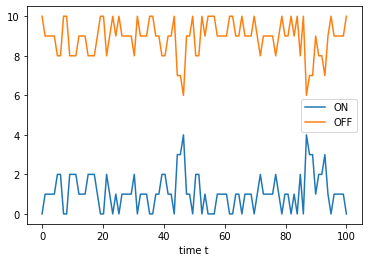

In [14]:
n=10
model = create_on_off_reaction(n)
%time results = model.run()

print("ratio ON/OFF:",
      np.sum(results['ON'])/len(results['ON'])/float(n),
      " / ",np.sum(results['OFF'])/len(results['OFF'])/float(n)
     )


plt.plot(results['time'],results['ON'],label='ON');
plt.plot(results['time'],results['OFF'],label='OFF');
plt.xlabel('time t')
plt.legend()
plt.show()

In [ ]:
if False:
    # reset the cache
    on_ratios = {}
    off_ratios = {}

In [45]:
x_vals = [1,2,3,4,5,6,7,8,9,10,11,12,15,25,35,50,100,1000]

In [46]:
for i,n in enumerate(x_vals):
    if n not in on_ratios or n not in off_ratios:
        model = create_on_off_reaction(n)
        results = model.run()
        ##print(f"{n}\tratio ON:",np.sum(results['ON'])/len(results['ON']))
        ##print(f"{n}\tratio OFF:",np.sum(results['OFF'])/len(results['OFF']))
        on_ratios[n] = np.sum(results['ON'])/len(results['ON'])/float(n)
        off_ratios[n] = np.sum(results['OFF'])/len(results['OFF'])/float(n)
    print(f"{n}\tratio ON/OFF:",on_ratios[n]," / ",off_ratios[n])


1	ratio ON/OFF: 0.94  /  0.06
2	ratio ON/OFF: 0.43  /  0.57
3	ratio ON/OFF: 0.27999999999999997  /  0.7200000000000001
4	ratio ON/OFF: 0.1875  /  0.8125
5	ratio ON/OFF: 0.148  /  0.852
6	ratio ON/OFF: 0.17333333333333334  /  0.8266666666666667
7	ratio ON/OFF: 0.15  /  0.85
8	ratio ON/OFF: 0.14125  /  0.85875
9	ratio ON/OFF: 0.11444444444444445  /  0.8855555555555555
10	ratio ON/OFF: 0.129  /  0.8710000000000001
11	ratio ON/OFF: 0.10909090909090909  /  0.890909090909091
12	ratio ON/OFF: 0.11083333333333334  /  0.8891666666666667
15	ratio ON/OFF: 0.10666666666666667  /  0.8933333333333333
25	ratio ON/OFF: 0.094  /  0.9059999999999999
35	ratio ON/OFF: 0.09514285714285714  /  0.9048571428571429
50	ratio ON/OFF: 0.0886  /  0.9114
100	ratio ON/OFF: 0.08449999999999999  /  0.9155
1000	ratio ON/OFF: 0.08967  /  0.9103300000000001


In [43]:
plot_x_vals = x_vals[0:10]
print(plot_x_vals)

[1, 2, 3, 4, 5, 7, 9, 10, 12, 15]


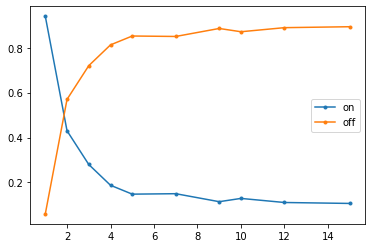

In [54]:

plt.plot(plot_x_vals,[on_ratios[k] for k in plot_x_vals],'.-',label="on")
plt.plot(plot_x_vals,[off_ratios[k] for k in plot_x_vals],'.-',label="off")
plt.legend()

In [48]:
results.plotplotly()

In [61]:
if False:
    # reset the cache
    num_traj = 100
    on_ratios_means = {}
    off_ratios_vars = {}
    off_ratios_means = {}
    on_ratios_vars = {}


In [62]:
print(on_ratios_means)
print(off_ratios_vars)
print(off_ratios_means)
print(on_ratios_vars)

{}
{}
{}
{}


In [76]:
for i,n in enumerate(x_vals):
    if n==1 \
      or n not in on_ratios_means or n not in off_ratios_means\
      or n not in on_ratios_vars or n not in off_ratios_vars:
        model = create_on_off_reaction(n)
        results = model.run(number_of_trajectories=num_traj)
        ##print(f"{n}\tratio ON:",np.sum(results['ON'])/len(results['ON']))
        ##print(f"{n}\tratio OFF:",np.sum(results['OFF'])/len(results['OFF']))
        on_ratios_means[n] = np.sum(results.average_ensemble()['ON'])/len(results.average_ensemble()['ON'])/float(n)
        off_ratios_means[n] = np.sum(results.average_ensemble()['OFF'])/len(results.average_ensemble()['OFF'])/float(n)
        on_ratios_vars[n] = np.sum(results.stddev_ensemble()['ON'])/len(results.stddev_ensemble()['ON'])/float(n)
        off_ratios_vars[n] = np.sum(results.stddev_ensemble()['OFF'])/len(results.stddev_ensemble()['OFF'])/float(n)
    print(f"{n}\tratio ON/OFF:",on_ratios_means[n],"+/-",on_ratios_vars[n]," / ",off_ratios_means[n],"+/-",off_ratios_vars[n])

1	ratio ON/OFF: 0.8999000000000001 +/- 0.28056611705480655  /  0.10010000000000002 +/- 0.2805661170548066
2	ratio ON/OFF: 0.4271999999999999 +/- 0.18642082572006316  /  0.5728 +/- 0.18642082572006316
3	ratio ON/OFF: 0.2839333333333333 +/- 0.15083485781990666  /  0.7160666666666667 +/- 0.15083485781990666
4	ratio ON/OFF: 0.21375000000000002 +/- 0.12631517529393238  /  0.7862500000000003 +/- 0.12631517529393235
5	ratio ON/OFF: 0.17484 +/- 0.11546770522567187  /  0.8251600000000001 +/- 0.11546770522567187
6	ratio ON/OFF: 0.154 +/- 0.10650932091298022  /  0.846 +/- 0.10650932091298022
7	ratio ON/OFF: 0.1366 +/- 0.09767162500530534  /  0.8634000000000002 +/- 0.09767162500530534
8	ratio ON/OFF: 0.12823749999999998 +/- 0.09110157433900916  /  0.8717625000000001 +/- 0.09110157433900916
9	ratio ON/OFF: 0.12187777777777778 +/- 0.08681887588119652  /  0.8781222222222221 +/- 0.08681887588119652
10	ratio ON/OFF: 0.11494 +/- 0.08248108548201837  /  0.88506 +/- 0.08248108548201837
11	ratio ON/OFF: 0.

In [72]:
plot_x_vals2 = x_vals[0:16]
print(plot_x_vals2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 25, 35, 50]


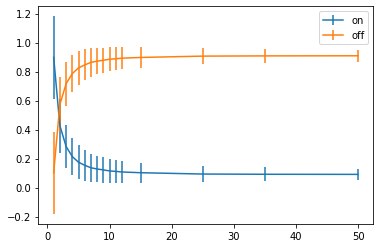

In [73]:
plt.errorbar(plot_x_vals2,[on_ratios_means[k] for k in plot_x_vals2],[on_ratios_vars[k] for k in plot_x_vals2],label="on")
plt.errorbar(plot_x_vals2,[off_ratios_means[k] for k in plot_x_vals2],[off_ratios_vars[k] for k in plot_x_vals2],label="off")
plt.legend()

In [88]:
model = create_on_off_reaction(1)
results = model.run(number_of_trajectories=num_traj)
results.plotplotly_mean_stdev()

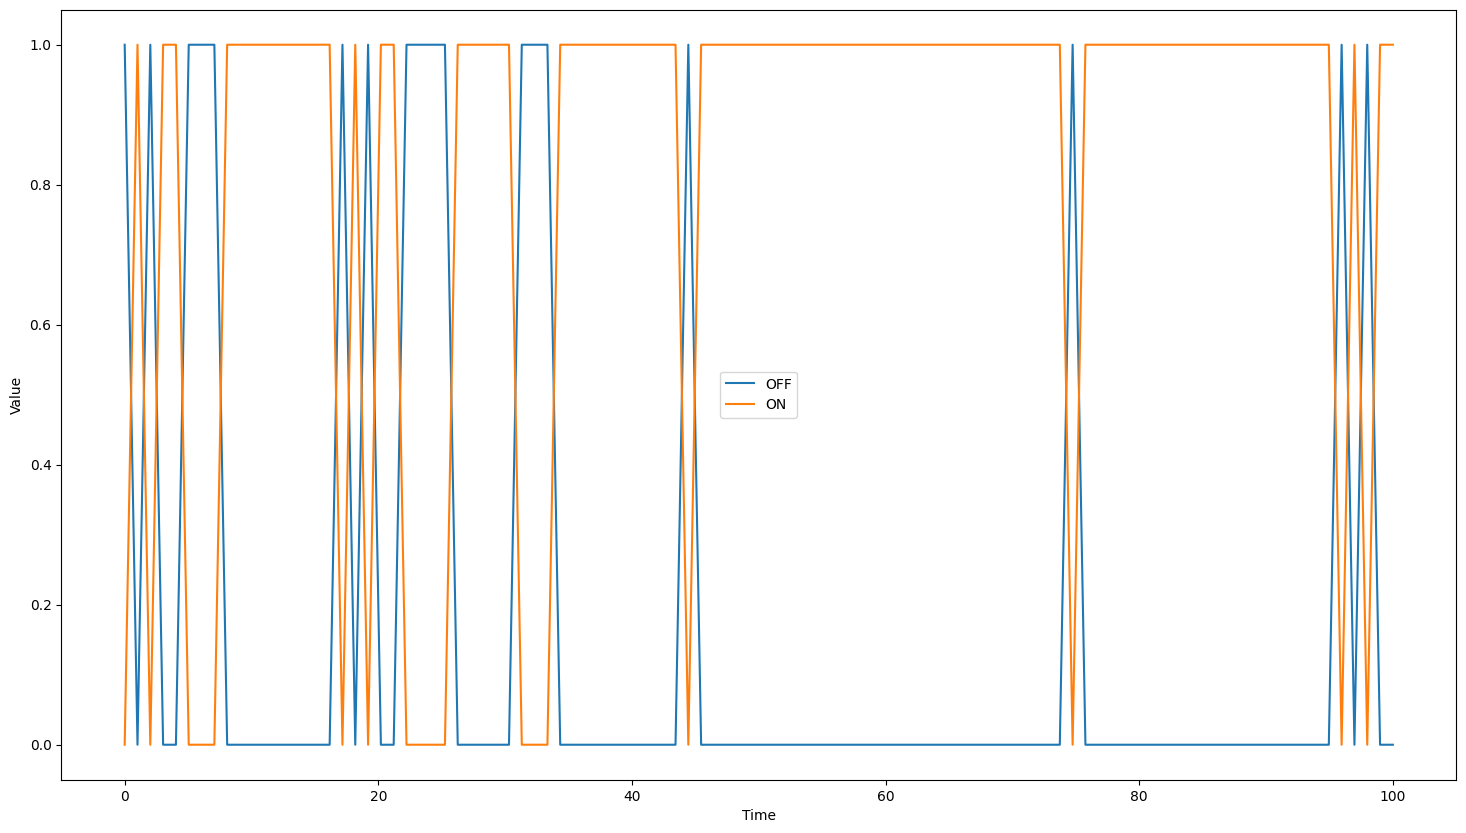

In [80]:
results.plot(index=0)

In [89]:
for n in range(num_traj):
    print(f"{n}\t{np.sum(results[n]['ON'])/len(results[n]['ON'])} \t {np.sum(results[n]['OFF'])/len(results[n]['OFF'])}")

0	0.86 	 0.14
1	0.86 	 0.14
2	0.86 	 0.14
3	0.85 	 0.15
4	0.84 	 0.16
5	0.89 	 0.11
6	0.95 	 0.05
7	0.9 	 0.1
8	0.94 	 0.06
9	0.94 	 0.06
10	0.89 	 0.11
11	0.82 	 0.18
12	0.95 	 0.05
13	0.88 	 0.12
14	0.9 	 0.1
15	0.91 	 0.09
16	0.93 	 0.07
17	0.82 	 0.18
18	0.89 	 0.11
19	0.95 	 0.05
20	0.91 	 0.09
21	0.92 	 0.08
22	0.88 	 0.12
23	0.82 	 0.18
24	0.95 	 0.05
25	0.84 	 0.16
26	0.9 	 0.1
27	0.9 	 0.1
28	0.89 	 0.11
29	0.9 	 0.1
30	0.91 	 0.09
31	0.91 	 0.09
32	0.86 	 0.14
33	0.85 	 0.15
34	0.77 	 0.23
35	0.87 	 0.13
36	0.89 	 0.11
37	0.9 	 0.1
38	0.93 	 0.07
39	0.92 	 0.08
40	0.89 	 0.11
41	0.95 	 0.05
42	0.94 	 0.06
43	0.93 	 0.07
44	0.89 	 0.11
45	0.88 	 0.12
46	0.89 	 0.11
47	0.95 	 0.05
48	0.94 	 0.06
49	0.88 	 0.12
50	0.89 	 0.11
51	0.93 	 0.07
52	0.91 	 0.09
53	0.85 	 0.15
54	0.91 	 0.09
55	0.89 	 0.11
56	0.9 	 0.1
57	0.97 	 0.03
58	0.92 	 0.08
59	0.92 	 0.08
60	0.96 	 0.04
61	0.86 	 0.14
62	0.92 	 0.08
63	0.95 	 0.05
64	0.88 	 0.12
65	0.82 	 0.18
66	0.87 	 0.13
67	0.95 	 0.05
68	0

In [90]:
n=5
model = create_on_off_reaction(n)
results = model.run(number_of_trajectories=num_traj)
results.plotplotly_mean_stdev()

In [91]:
for n in range(num_traj):
    print(f"{n}\t{np.sum(results[n]['ON']/float(5))/len(results[n]['ON'])} \t {np.sum(results[n]['OFF']/float(5))/len(results[n]['OFF'])}")

0	0.16799999999999998 	 0.8320000000000001
1	0.16999999999999996 	 0.8299999999999998
2	0.15599999999999997 	 0.8439999999999999
3	0.172 	 0.828
4	0.16999999999999993 	 0.8299999999999998
5	0.18799999999999994 	 0.8119999999999997
6	0.15999999999999998 	 0.84
7	0.20199999999999999 	 0.7979999999999998
8	0.182 	 0.818
9	0.16399999999999998 	 0.836
10	0.168 	 0.8320000000000001
11	0.15399999999999997 	 0.846
12	0.16 	 0.8399999999999999
13	0.162 	 0.838
14	0.15599999999999997 	 0.8440000000000001
15	0.152 	 0.8480000000000001
16	0.15599999999999997 	 0.8439999999999999
17	0.17999999999999994 	 0.82
18	0.16199999999999995 	 0.8379999999999999
19	0.17999999999999997 	 0.8199999999999998
20	0.18399999999999994 	 0.8159999999999998
21	0.17799999999999996 	 0.8220000000000001
22	0.188 	 0.8119999999999998
23	0.16999999999999996 	 0.8299999999999998
24	0.18599999999999997 	 0.814
25	0.17 	 0.83
26	0.19399999999999998 	 0.8059999999999999
27	0.18799999999999997 	 0.8119999999999998
28	0.1699999

In [99]:
all_solvers = \
[gillespy2.NumPySSASolver,
 gillespy2.SSACSolver,
 gillespy2.TauLeapingSolver,
 gillespy2.TauLeapingCSolver,
 gillespy2.TauHybridSolver,
 gillespy2.TauHybridCSolver,
 gillespy2.ODESolver,
 gillespy2.ODECSolver,
 gillespy2.CLESolver]
s_xvals = [1,2,3,5,7,9]

In [103]:
if False:
    # reset the cache
    s_on_ratios = {}
    s_off_ratios = {}

print(s_on_ratios)
print(s_off_ratios)

{'NumPySSASolver': {1: 0.09}}
{'NumPySSASolver': {1: 0.91}}


In [104]:
#test all the solvers
for sol in all_solvers:
    print(sol.name)
    if sol.name not in s_on_ratios: s_on_ratios[sol.name]={}
    if sol.name not in s_off_ratios: s_off_ratios[sol.name]={}
    for i,n in enumerate(s_xvals):
        if n not in s_on_ratios[sol.name] or n not in s_off_ratios[sol.name]:
            model = create_on_off_reaction(n)
            s = sol(model=model)
            results = s.run()
            ##print(f"{n}\tratio ON:",np.sum(results['ON'])/len(results['ON']))
            ##print(f"{n}\tratio OFF:",np.sum(results['OFF'])/len(results['OFF']))
            s_on_ratios[sol.name][n] = np.sum(results['ON'])/len(results['ON'])/float(n)
            s_off_ratios[sol.name][n] = np.sum(results['OFF'])/len(results['OFF'])/float(n)
        print(f"{n}\tratio ON/OFF:",s_on_ratios[sol.name][n]," / ",s_off_ratios[sol.name][n])

NumPySSASolver
1	ratio ON/OFF: 0.09  /  0.91
2	ratio ON/OFF: 0.095  /  0.905
3	ratio ON/OFF: 0.14666666666666667  /  0.8533333333333334
5	ratio ON/OFF: 0.09  /  0.9099999999999999
7	ratio ON/OFF: 0.10285714285714286  /  0.8971428571428571
9	ratio ON/OFF: 0.08888888888888889  /  0.911111111111111
SSACSolver
1	ratio ON/OFF: 0.93  /  0.07
2	ratio ON/OFF: 0.385  /  0.615
3	ratio ON/OFF: 0.26666666666666666  /  0.7333333333333334
5	ratio ON/OFF: 0.16599999999999998  /  0.834
7	ratio ON/OFF: 0.15714285714285717  /  0.8428571428571429
9	ratio ON/OFF: 0.12555555555555553  /  0.8744444444444445
TauLeapingSolver
1	ratio ON/OFF: 0.11  /  0.89
2	ratio ON/OFF: 0.065  /  0.935
3	ratio ON/OFF: 0.16333333333333333  /  0.8366666666666666
5	ratio ON/OFF: 0.13  /  0.8699999999999999
7	ratio ON/OFF: 0.11857142857142856  /  0.8814285714285715
9	ratio ON/OFF: 0.13  /  0.87
TauLeapingCSolver
1	ratio ON/OFF: 0.18  /  0.82
2	ratio ON/OFF: 0.105  /  0.895
3	ratio ON/OFF: 0.19333333333333333  /  0.80666666666666

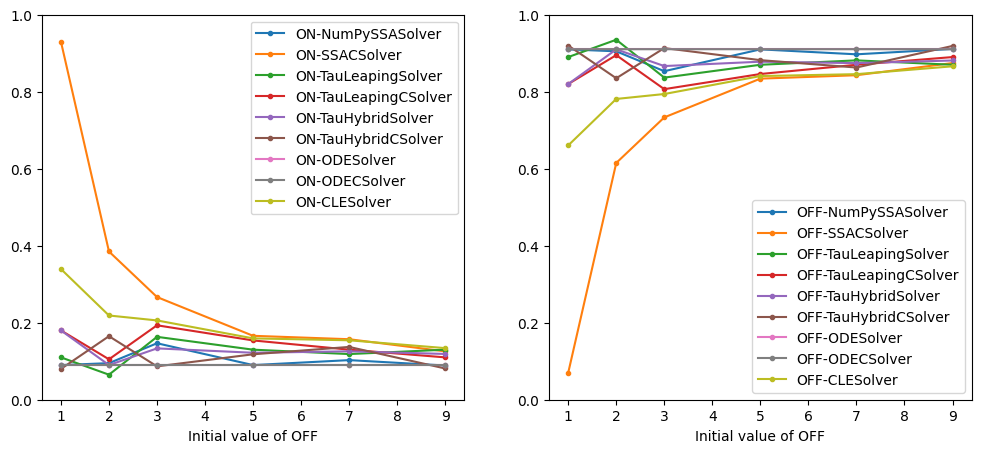

In [123]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for sol in all_solvers:
    #if sol.name in ['NumPySSASolver','SSACSolver','ODESolver','TauLeapingSolver','TauHybridSolver']:
    plt.plot(s_xvals,[s_on_ratios[sol.name][k] for k in s_xvals],'.-',label=f"ON-{sol.name}")
    plt.ylim(0,1)
    plt.xlabel("Initial value of OFF (N)")
    plt.ylable("Probability of ")
    plt.legend()
plt.subplot(1,2,2)
for sol in all_solvers:
    #if sol.name in ['NumPySSASolver','SSACSolver','ODESolver','TauLeapingSolver','TauHybridSolver']:  
    plt.plot(s_xvals,[s_off_ratios[sol.name][k] for k in s_xvals],'.-',label=f"OFF-{sol.name}")
    plt.ylim(0,1)
    plt.xlabel("Initial value of OFF (N)")
    plt.legend()

In [107]:
s_xvals

[1, 2, 3, 5, 7, 9]

In [108]:
sol.name

'NumPySSASolver'

In [109]:
s_on_ratios[sol.name]

{1: 0.09,
 2: 0.095,
 3: 0.14666666666666667,
 5: 0.09,
 7: 0.10285714285714286,
 9: 0.08888888888888889}

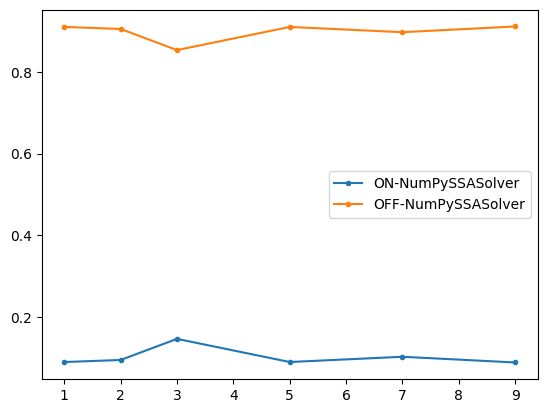

In [127]:
plt.plot(s_xvals,[s_on_ratios['NumPySSASolver'][k] for k in s_xvals],'.-',label=f"ON-NumPySSASolver")
plt.plot(s_xvals,[s_off_ratios['NumPySSASolver'][k] for k in s_xvals],'.-',label=f"OFF-NumPySSASolver")
plt.legend()